# Which one is a better plan?

As an analyst for the telecom operator Megaline, the job is to analyze the two prepaid plans the company offers, Surf and Ultimate. Providing what commercial department wants to know: which of the plans brings in more revenue in order to adjust the advertising budget.


##  Introduction
Presented is a preliminary analysis of the plans based on a relatively small client selection. Consisit of data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. 

###  Goal:
This report will focus on analyzing the clients' behavior and determine which prepaid plan brings in more revenue:

1. Surf
2. Ultimate


### Stages:
This project will consist of the following stages:

1. Initialization
2. Data Preprocessing
    1. Plans
        1. Fix and enrich data
    2. Users
        1. Fix and enrich data
    3. Calls
        1. Fix and enrich data
    4. Messages
        1. Fix and enrich data
    5. Internet
        1. Fix and enrich data
    6. Study plan conditions
    7. Aggregate data
3. Study user behavior
    1. Calls
    2. Messages
    3. Internet
4. Study Revenue
5. Test Statistical Hypotheses 
    1. The average revenue from users of the Ultimate and Surf calling plans differs
    2. The average revenue from users in the NY-NJ area is different from that of the users from the other regions
6. Conclusion
         

## Initialization

Importing all necessary libraries for this project

In [1]:
# Loading all the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import functools as ft
import seaborn as sns

## Load data

In [2]:
# Load the data files into different DataFrames

#call info
calls = pd.read_csv('/datasets/megaline_calls.csv')

#user info
users = pd.read_csv('/datasets/megaline_users.csv')

#message info
messages = pd.read_csv('/datasets/megaline_messages.csv')

#internet info
internet = pd.read_csv('/datasets/megaline_internet.csv')

#plans info
plans = pd.read_csv('/datasets/megaline_plans.csv')



# Data Preprocessing

We will check each dataframe and see if anything appears to be off and correct them.

## Plans

In [3]:
# The general/summary information about the plans' DataFrame

plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


The plans dataframe contains the following:
- `plan_name` — calling plan name
- `usd_monthly_fee` — monthly charge in US dollars
- `minutes_included` — monthly minute allowance
- `messages_included` — monthly text allowance
- `mb_per_month_included` — data volume allowance (in megabytes)
- `usd_per_minute` - price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
- `usd_per_message` — price per text after exceeding the package limits
- `usd_per_gb` — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

There are only two types of plans: surf or ultimate. 

In [4]:
# A sample of data for plans

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


We will convert mb_per_month_included to gb_per_month_included, as the extra are being charged based on gb instead of mb.

### Fix & Enrich data

In [5]:
#convert 'mb_per_month' to "gb_per_month"

plans['gb_per_month_included'] = plans['mb_per_month_included']/1024

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Users

We will then look at the users information.

In [6]:
# General/summary information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


The users table (data on users):
- `user_id` — unique user identifier
- `first_name` — user's name
- `last_name` — user's last name
- `age` — user's age (years)
- `reg_date` — subscription date (dd, mm, yy)
- `churn_date` — the date the user stopped using the service (if the value is missing, the calling plan was being used when this database was extracted)
- `city` — user's city of residence
- `plan` — calling plan name

In [7]:
# A sample of data for users

users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


We have noticed that the column'churn_date' might contain missing data, however, this column describes the date the user stopped using the service. If the value is missing, the call plan is still being used. Therefore, we will leave this column alone. We will change reg_date to date_time. Can also change 'plan' to categorical column.

### Fix and Enrich Data

change reg_date to date_time type

In [8]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


Change 'plan' to category

In [9]:
#change to categorical values

users['plan'] = users['plan'].astype('category')

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    category      
 7   churn_date  34 non-null     object        
dtypes: category(1), datetime64[ns](1), int64(2), object(4)
memory usage: 28.1+ KB


## Calls

Checking the calls. 

In [10]:
# The general/summary information about the calls' DataFrame

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


The calls dataframe consist of the following:
- `id` — unique call identifier
- `call_date` — call date
- `duration` — call duration (in minutes)
- `user_id` — the identifier of the user making the call

In [11]:
# A sample of data for calls

calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


It appears that there no visible missing values. However, the call_date should be changed into date-time type. We will need to round up the duration according to the company's policy. 

### Fix data

**Change the call_date column to date_time type.**

In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

calls.rename(columns = {'id':'call_id'}, inplace = True)
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   call_id    137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


**Rounding up the duration**

In [13]:
calls['duration'] = np.ceil(calls['duration'])

calls['duration'].head()

0     9.0
1    14.0
2    15.0
3     6.0
4     5.0
Name: duration, dtype: float64

### Enrich data

Since this consist of mulitple entries from the same user, it will be best to group them by user_id. and we can find the total duration of calls and how many total calls each user has made. Finally find the monthly average for calls and call duration for each user. 

To group by user_id and month


In [14]:
# To make sure there are indeed records of 12 months
calls['months'] = calls['call_date'].dt.month

#len(calls['call_months'].unique())

calls_1 = calls.groupby(['user_id','months'])['duration'].sum()
calls_1 = calls_1.reset_index()
calls_1.head(20)

,user_id,months,duration
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
5,1001,12,412.0
6,1002,10,59.0
7,1002,11,386.0
8,1002,12,384.0
9,1003,12,1104.0


## Messages

**Checking the messages**

In [15]:
# The general/summary information about the messages' DataFrame

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


The messages table consists of the following:
- `id` — unique text message identifier
- `message_date` — text message date
- `user_id` — the identifier of the user sending the text

In [16]:
# A sample of data for messages

messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


We can do the same thing for this table, first changing the message_date to date_time type, then proceed with enrichment.

### Fix data

Let's fix the data type.

In [17]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
messages['months'] = messages['message_date'].dt.month

messages.rename(columns = {'id':'message_id'}, inplace=True)
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   message_id    76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   months        76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


### Enrich data

We will repeat the steps in calls, since this also consist of mulitple entries from the same user, it will be best to group them by user_id. Follow by finding the total messages sent by each user. And finally, the monthly average for texts per each user. 

To group and find the total.

In [18]:
#grouping
messages_1 = messages.groupby(['user_id','months'])['message_date'].count()
messages_1 = messages_1.reset_index()
messages_1.head()

,user_id,months,message_date
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


## Internet

**Checking the internet usage**

In [19]:
# The general/summary information about the internet DataFrame

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


The internet table consists of the following:
- `id` — unique session identifier
- `mb_used` — the volume of data spent during the session (in megabytes)
- `session_date` — web session date
- `user_id` — user identifier

In [20]:
# A sample of data for the internet traffic

internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Similar to what we have done before, we first need to change the datatype to date_time for session_date, and round up the total mb_used per user per company policy. 

### Fix data

We will change the data_type to date_time for clarity.

In [21]:
#change the data type

internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

internet.rename(columns = {'id':'internet_id'},inplace=True)
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   internet_id   104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enrich data

We will repeat the steps in calls and messages, since this also consist of mulitple entries from the same user, it will be best to group them by user_id. Follow by finding the total internet usage(in MB) per each user, we will round up the total per company's policy (in GB). And finally, the monthly average for internet useage(in MB) per each user for clear visual purpose. 

Group by 'user_id' and month.

In [22]:
#get months
internet['months'] = internet['session_date'].dt.month

#group by userid and month

internet_1 = internet.groupby(['user_id','months'])['mb_used'].sum()

internet_1 = internet_1.reset_index()

internet_1.head()

,user_id,months,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


## Study plan conditions

Since it is critical to understand how the plans work, how users are charged based on their plan subscription. We will print out the plan information to view their conditions once again

In [23]:
# Print out the plan conditions
plans.info()
plans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      float64
dtypes: float64(3), int64(5), object(1)
memory usage: 272.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Aggregate data per user


We will put the aggregate data (done in enrichment steps) together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.

All tables except for 'plans', users are being identified by the 'user_id' column. We will use that to merge the tables.


In [24]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
data1 = users.merge(calls_1, on = 'user_id', how='outer')
data2 = data1.merge(messages_1, on =['user_id','months'], how='outer')
data_final = data2.merge(internet_1, on =['user_id','months'], how = 'outer')
data_final.head(30)

#renaming + adding necessary columns

data_final['gb_used'] = data_final['mb_used']/1024

data_final['gb_used'] = np.ceil(data_final['gb_used'])


data_final.rename(columns = {'message_date':'monthly_message_total'}, inplace=True)
data_final.info()
data_final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312 entries, 0 to 2311
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2312 non-null   int64         
 1   first_name             2277 non-null   object        
 2   last_name              2277 non-null   object        
 3   age                    2277 non-null   float64       
 4   city                   2277 non-null   object        
 5   reg_date               2277 non-null   datetime64[ns]
 6   plan                   2277 non-null   category      
 7   churn_date             160 non-null    object        
 8   months                 2293 non-null   float64       
 9   duration               2258 non-null   float64       
 10  monthly_message_total  1806 non-null   float64       
 11  mb_used                2277 non-null   float64       
 12  gb_used                2277 non-null   float64       
dtypes: 

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,months,duration,monthly_message_total,mb_used,gb_used
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,12.0,124.0,11.0,1901.47,2.0
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,8.0,182.0,30.0,6919.15,7.0
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,9.0,315.0,44.0,13314.82,14.0
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,10.0,393.0,53.0,22330.49,22.0
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,11.0,426.0,36.0,18504.30,19.0


We will then calculate the monthly revenue from each user. We will subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan. 

In [26]:
# Calculate the monthly revenue for each user

#create a function called monthly_revenue that takes row as argument
def monthly_revenue(row):
    
    #a variable for additional minutes
    additional_mins = 0
    
    #a variable for additional messages
    additional_message = 0
    
    #a variable for additional data
    additional_data_gb = 0
    
    #base charge for surf plan
    surf_base = 20
    
    #base charge for ultimate plan
    ultimate_base = 70
    
    #variable plan that takes the value from column plan from row
    plan = row['plan']
    
    #condtion statement
    if plan == 'surf':
        
        #if this value is greater than what is included in the plan
        if row['duration'] > 500:
            
            #calculates how much over
            additional_mins = row['duration'] - 500
         
        #if this value is greater than what is included in the plan
        if row['monthly_message_total'] > 50:
            
            #calculates how much over
            additional_message = row['monthly_message_total'] - 50
        
        #if this value is greater than what is included in the plan
        if row['gb_used'] > 15:
            
            #calculates how much over
            additional_data_gb = row['gb_used'] - 15
            
        #calculate the profit from users using more than what is included in the plan    
        profit = (additional_mins * 0.03) + (additional_message * 0.03) + (additional_data_gb * 10)
        
        #condition, if they did not use more than what is included
        if profit == 0:
            
            #monthly revenue will be the base charge
            return surf_base
        
        #if they did
        else:
            
            #montly revenue will be the base charge plus the profit for over-usage
            return profit + surf_base
        
    if plan == 'ultimate':
        
        #if this value is greater than what is included in the plan
        if row['duration'] > 3000:
            
            #calculates how much over
            additional_mins = row['duration'] - 3000
        
        #if this value is greater than what is included in the plan
        if row['monthly_message_total'] > 1000:
            
            #calculates how much over
            additional_message = row['monthly_message_total'] - 1000
        
        #if this value is greater than what is included in the plan
        if row['gb_used'] > 30:
            
            #calculates how much over
            additional_data_gb = row['gb_used'] - 30
        
         #calculate the profit from users using more than what is included in the plan
        profit = (additional_mins * 0.01) + (additional_message * 0.01) + (additional_data_gb * 7)
        
        #condition, if they did not use more than what is included
        if profit == 0:
            
             #monthly revenue will be the base charge
            return ultimate_base
       
        #if they did
        else:
            
            #montly revenue will be the base charge plus the profit for over-usage
            return profit + ultimate_base
        
#applying the function to users_all_final, append each row, result store in new column 'monthly_revenue'
data_final['monthly_revenue'] = data_final.apply(monthly_revenue, axis = 1)

#check
data_final.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,months,duration,monthly_message_total,mb_used,gb_used,monthly_revenue
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,12.0,124.0,11.0,1901.47,2.0,70.00
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,8.0,182.0,30.0,6919.15,7.0,20.00
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,9.0,315.0,44.0,13314.82,14.0,20.00
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,10.0,393.0,53.0,22330.49,22.0,90.09
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,11.0,426.0,36.0,18504.30,19.0,60.00


Everything looks good, we can now move on to the analysis.

## Study user behavior

We will use some descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Multiple useful plots were drawn to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots has been calculated on a per-plan basis.

### Calls

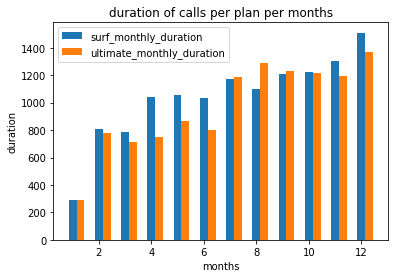

<Figure size 720x360 with 0 Axes>

In [27]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
surf_data = data_final.query('plan == "surf"')
ultimate_data = data_final.query('plan == "ultimate"')

width = 0.3       

plt.bar(surf_data['months'], surf_data['duration'], width, label = 'surf_monthly_duration')
plt.bar(ultimate_data['months'] + width, ultimate_data['duration'], width, label ='ultimate_monthly_duration')
plt.legend()
plt.title('duration of calls per plan per months')
plt.xlabel('months')
plt.ylabel('duration')
plt.figure(figsize=(10,5))
plt.show()


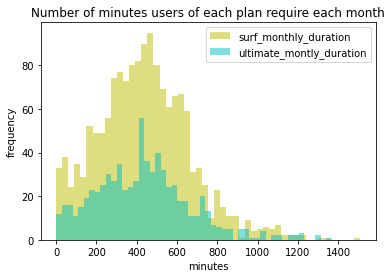

In [47]:
# Compare the number of minutes users of each plan.

plt.hist(surf_data['duration'],bins= 50, alpha = 0.5, color = 'y', label = 'surf_monthly_duration')
plt.hist(ultimate_data['duration'],bins = 50, alpha =0.5, color = 'c', label = 'ultimate_montly_duration')
plt.legend(loc='upper right')
plt.title('Number of minutes users of each plan require each month')
plt.xlabel('minutes')
plt.ylabel('frequency')
plt.show()


Calculation of mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.

In [29]:
# The mean and the variance of the monthly call duration

print('the mean of the monthly call duration for surf plan users is:', surf_data['duration'].mean())
print('the variance of the monthly call duration for surf plan users is:', np.var(surf_data['duration']))

print('the mean of the monthly call duration for ultimate plan users is:', ultimate_data['duration'].mean())
print('the variance of the monthly call duration for ultimate plan users is:', np.var(ultimate_data['duration']))

the mean of the monthly call duration for surf plan users is: 436.51974110032364
the variance of the monthly call duration for surf plan users is: 52537.03666530514
the mean of the monthly call duration for ultimate plan users is: 434.67601683029454
the variance of the monthly call duration for ultimate plan users is: 56494.28633925357


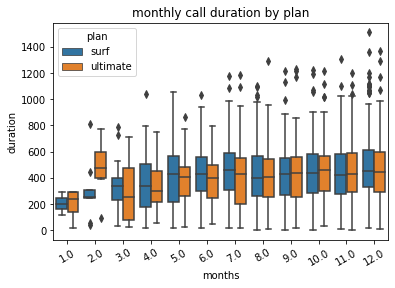

In [30]:
# Plot a boxplot to visualize the distribution of the monthly call duration

ax = sns.boxplot(x='months', y='duration', hue='plan', data=data_final)

ax.set_title('monthly call duration by plan')

ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


Based on the descriptive statistics, the bar plot showed that surf users has used more call minutes than ultimate users in majority of the months. And majority of them used well over 500 minutes. The histogram reflects the same, higher frequency for surf users for >500 mins, considering they will have pay extra for overusage. Although the mean and variance are similar, but we need to consider that surf users have a lower limit for monthly call duration. The median appeard to be similar for both surf and ultimate users except for Feb and March. However, surf and ultimate both have multiple outliers that falls outside of the upper limit. Suggesting surf users tend to use more than what is included in the package. 

Therefore, I think it is safe to conclude that based on the statistics, surf plan users is more likely to use more than what is included in the package for call minutes, thus generating revenue for the company. 

### Messages

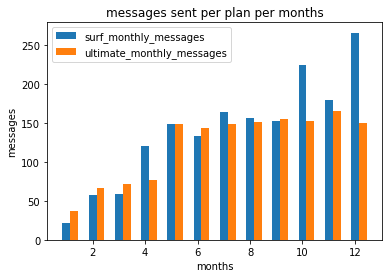

<Figure size 720x360 with 0 Axes>

In [31]:
# The number of messages users of each plan tend to send each month

width = 0.3       

plt.bar(surf_data['months'], surf_data['monthly_message_total'], width, label = 'surf_monthly_messages')
plt.bar(ultimate_data['months'] + width, ultimate_data['monthly_message_total'], width, label ='ultimate_monthly_messages')
plt.legend()
plt.title('messages sent per plan per months')
plt.xlabel('months')
plt.ylabel('messages')
plt.figure(figsize=(10,5))
plt.show()


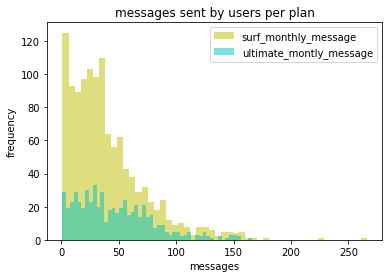

In [32]:
# Compare the amount of messages sent by users per plan

plt.hist(surf_data['monthly_message_total'],bins= 50, alpha = 0.5, color = 'y', label = 'surf_monthly_message')
plt.hist(ultimate_data['monthly_message_total'],bins = 50, alpha =0.5, color = 'c', label = 'ultimate_montly_message')
plt.legend(loc='upper right')
plt.title('messages sent by users per plan')
plt.xlabel('messages')
plt.ylabel('frequency')
plt.show()


In [33]:
# The mean and the variance of the monthly message sent by user

print('the mean of the monthly message for surf plan users is:', surf_data['monthly_message_total'].mean())
print('the variance of the monthly message for surf plan users is:', np.var(surf_data['monthly_message_total']))

print('the mean of the monthly message for ultimate plan users is:', ultimate_data['monthly_message_total'].mean())
print('the variance of the monthly message for ultimate plan users is:', np.var(ultimate_data['monthly_message_total']))

the mean of the monthly message for surf plan users is: 39.98073701842546
the variance of the monthly message for surf plan users is: 1100.6152068269882
the mean of the monthly message for ultimate plan users is: 46.4559585492228
the variance of the monthly message for ultimate plan users is: 1082.5209446338606


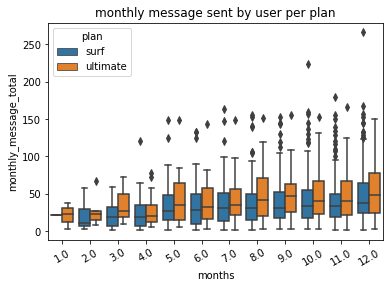

In [34]:
# Plot a boxplot to visualize the distribution of the monthly message sent by user per plan

ax = sns.boxplot(x='months', y='monthly_message_total', hue='plan', data=data_final)

ax.set_title('monthly message sent by user per plan')

ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

Based on the descriptive statistics, the bar plot showed that surf users has sent more messages than ultimate users in some of the months. What is more important, is that except for Jan, surf users tend to sent more than 50 messages each month. The histogram reflects the same, higher frequency for surf users for >50 messages, considering they will have pay extra for overusage. Although the mean and variance are similar, but we need to consider that surf users have a lower limit for monthly call duration, ultimate users have a much higher limit. The median appeard to be pretty higher for ultimate users. However, surf users appeared to have more outliers that falls outside of the upper limit. Suggesting surf users do use more than what is included in the package. 

Therefore, I think it is safe to conclude that based on the statistics, surf plan users is more likely to use more than what is included in the package for messages, as they have a much lower limit than ultimate users, thus generating revenue for the company. 

### Internet

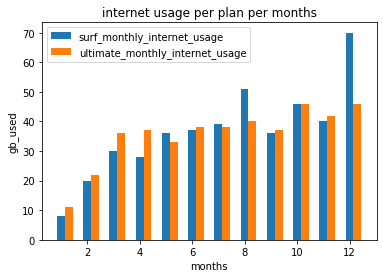

<Figure size 720x360 with 0 Axes>

In [35]:
# The number of internet usage per plan per month in gb

width = 0.3       

plt.bar(surf_data['months'], surf_data['gb_used'], width, label = 'surf_monthly_internet_usage')
plt.bar(ultimate_data['months'] + width, ultimate_data['gb_used'], width, label ='ultimate_monthly_internet_usage')
plt.legend()
plt.title('internet usage per plan per months')
plt.xlabel('months')
plt.ylabel('gb_used')
plt.figure(figsize=(10,5))
plt.show()

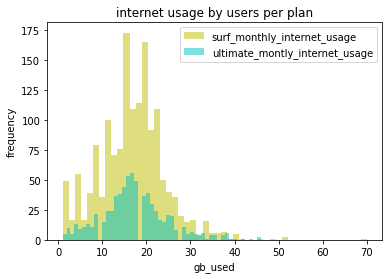

In [36]:
# Compare the amount of messages sent by users per plan

plt.hist(surf_data['gb_used'],bins= 50, alpha = 0.5, color = 'y', label = 'surf_monthly_internet_usage')
plt.hist(ultimate_data['gb_used'],bins = 50, alpha =0.5, color = 'c', label = 'ultimate_montly_internet_usage')
plt.legend(loc='upper right')
plt.title('internet usage by users per plan')
plt.xlabel('gb_used')
plt.ylabel('frequency')
plt.show()


In [37]:
# The mean and the variance of the monthly internet usage by plan

print('the mean of the monthly internet usage for surf plan users is:', surf_data['gb_used'].mean())
print('the variance of the monthly internet usage for surf plan users is:', np.var(surf_data['gb_used']))

print('the mean of the monthly internet usage for ultimate plan users is:', ultimate_data['gb_used'].mean())
print('the variance of the monthly internet usage for ultimate plan users is:', np.var(ultimate_data['gb_used']))

the mean of the monthly internet usage for surf plan users is: 16.783006535947713
the variance of the monthly internet usage for surf plan users is: 56.908469392114135
the mean of the monthly internet usage for ultimate plan users is: 17.370266479663393
the variance of the monthly internet usage for ultimate plan users is: 57.37762924175156


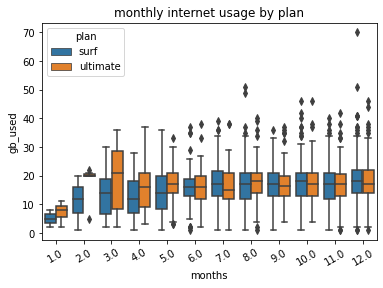

In [38]:
# Plot a boxplot to visualize the distribution of the monthly internet usage

ax = sns.boxplot(x='months', y='gb_used', hue='plan', data=data_final)

ax.set_title('monthly internet usage by plan')

ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


Based on the descriptive statistics, the bar plot showed that surf users has used more internet than ultimate users in some of the months. What is more important, is that except for Jan, surf users tend to use more than 15gb each month. The histogram reflects the same, higher frequency for surf users for>15gb, considering they will have pay extra for overusage. Although the mean and variance are similar, but we need to consider that surf users have a lower limit for monthly call duration, ultimate users have a much higher limit. The median appeard to vary from month to month. However, surf users appeared to have more outliers that falls outside of the upper limit. Suggesting surf users do use more than what is included in the package. 

Therefore, I think it is safe to conclude that based on the statistics, surf plan users is more likely to use more than what is included in the package for internet, as they have a much lower limit than ultimate users, thus generating revenue for the company. 

## Revenue

Let's look at the revenue see if it confirms what we saw in previous steps.

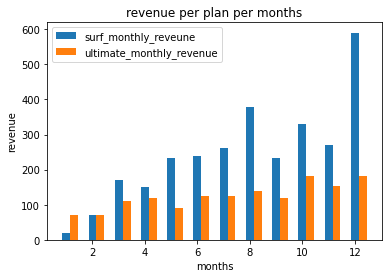

<Figure size 720x360 with 0 Axes>

In [39]:
# The number of revenue generated by plan per month 

width = 0.3       

plt.bar(surf_data['months'], surf_data['monthly_revenue'], width, label = 'surf_monthly_reveune')
plt.bar(ultimate_data['months'] + width, ultimate_data['monthly_revenue'], width, label ='ultimate_monthly_revenue')
plt.legend()
plt.title('revenue per plan per months')
plt.xlabel('months')
plt.ylabel('revenue')
plt.figure(figsize=(10,5))
plt.show()

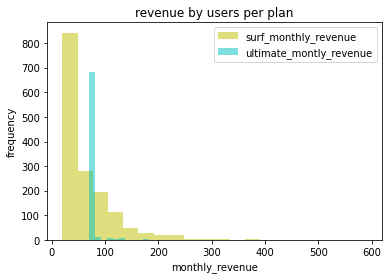

In [40]:
# Compare the revenues generated by users per plan

plt.hist(surf_data['monthly_revenue'],bins= 20, alpha = 0.5, color = 'y', label = 'surf_monthly_revenue')
plt.hist(ultimate_data['monthly_revenue'],bins = 10, alpha =0.5, color = 'c', label = 'ultimate_montly_revenue')
plt.legend(loc='upper right')
plt.title('revenue by users per plan')
plt.xlabel('monthly_revenue')
plt.ylabel('frequency')
plt.show()


In [41]:
# The mean and the variance of the monthly revenue generated by plan

print('the mean of the monthly revenue for surf plan users is:', surf_data['monthly_revenue'].mean())
print('the variance of the monthly revenue for surf plan users is:', np.var(surf_data['monthly_revenue']))

print('the mean of the monthly revenue for ultimate plan users is:', ultimate_data['monthly_revenue'].mean())
print('the variance of the monthly revenue for ultimate plan users is:', np.var(ultimate_data['monthly_revenue']))

the mean of the monthly revenue for surf plan users is: 59.79070603337613
the variance of the monthly revenue for surf plan users is: 2853.3886915425956
the mean of the monthly revenue for ultimate plan users is: 72.2586926286509
the variance of the monthly revenue for ultimate plan users is: 127.65491400705278


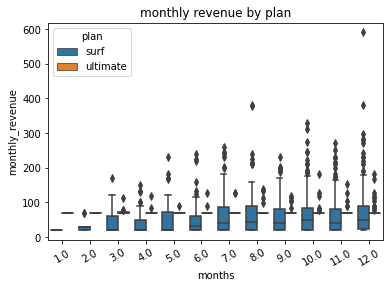

In [42]:
# Plot a boxplot to visualize the distribution of the monthly revenue

ax = sns.boxplot(x='months', y='monthly_revenue', hue='plan', data=data_final)

ax.set_title('monthly revenue by plan')

ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

As expected, the bar plot showed that surf users generates more revenue than ultimate users in most of the months. What is more important is that ultimate users pay higher amount for their packages, even then surf users generated more revenues. The histogram reflects the same, most of the ultimate users stayed within their usage limit, therefore only paying for the package, without generating any additional revenue. Surf users in another hand, some stayed within the limit, but most seemed to over-used and had to pay extra. The mean for surf users is well above their base: 20, ultimate users stayed within the base: 70. The median for ultimate users appeared to be higher than surf users, as expected, since their monthly based charge is higher. However, surf users appeared to have more outliers that falls outside of the upper limit and the median is well above 20. Suggesting surf users do pay more than their base charge. 

Therefore, I think it is safe to conclude that based on the statistics, surf plan users is more likely to use more than what is included in the package, as they have a much lower limit than ultimate users, thus generating revenue for the company. 

## Test statistical hypotheses

We will then test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.

- Null Hypothesis: the average revenue from users of the Ultimate and Surf calling plans is the same.
- Alternative Hypothesis: the average revenue from users of the Ultimate and Surf calling plans is not the same.

In [43]:
#average monthly revenue from surf

surf_avg_rev = surf_data['monthly_revenue']

#average monthly revenue from ultimate

ultimate_avg_rev = ultimate_data['monthly_revenue']

#set alpha

alpha = 0.05

#calculation

results = st.ttest_ind(surf_avg_rev, ultimate_avg_rev, equal_var = False)
print('p-value:', results.pvalue)

# Test the hypotheses

if results.pvalue > alpha:
    print('we fail to reject the null hypothesis')

if results.pvalue < alpha:
    print('we reject the null hypothesis')


p-value: 3.2711313208529917e-18
we reject the null hypothesis


Based on the statistical analysis, we reject the null hypothesis, thus accepting the alternative hypothesis: **the average revenue from users of the Ultimate and Surf calling plans is not the same.**



We will test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.

- Null Hypothesis: the average revenue from users in the NY-NJ area and the other regions area is the same.
- Alternative Hypothesis: the average revenue from users in the n the NY-NJ area and the other regions is not the same.

Before testing our hypotheses, we need to categorize our data based on the region.

In [44]:
data_final = data_final.dropna(subset = ['city'])

def region(city):
    if 'NY' in city or 'NJ' in city or 'NY-NJ' in city or 'NJ-NY' in city:
        return 'NY-NJ'
    else:
        return 'other'
    
data_final['region'] = data_final['city'].apply(region)

data_final.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,months,duration,monthly_message_total,mb_used,gb_used,monthly_revenue,region
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,12.0,124.0,11.0,1901.47,2.0,70.00,other
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,8.0,182.0,30.0,6919.15,7.0,20.00,other
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,9.0,315.0,44.0,13314.82,14.0,20.00,other
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,10.0,393.0,53.0,22330.49,22.0,90.09,other
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,11.0,426.0,36.0,18504.30,19.0,60.00,other


In [45]:
NY_NJ = data_final.query('region == "NY-NJ"')
others = data_final.query('region == "other"')

NY_NJ_avg_rev = NY_NJ['monthly_revenue']
others_avg_rev = others['monthly_revenue']

#set alpha
alpha = 0.05

#calculation

results = st.ttest_ind(NY_NJ_avg_rev, others_avg_rev, equal_var = False)
print('p-value:', results.pvalue)

# Test the hypotheses

if results.pvalue > alpha:
    print('we fail to reject the null hypothesis')

if results.pvalue < alpha:
    print('we reject the null hypothesis')

p-value: 0.07259981401237166
we fail to reject the null hypothesis


Based on the results of our statstical analysis, we fail to reject he null hypothesis. Thus: **the average revenue from users in the NY-NJ area and the other regions area is the same.**

## Conclusion

Data had been consolidated from several sources (calls, internet, messages, users) to retrieve the information needed. We have grouped the data by calls - months, internet - months, message - months, and finally aggregated them to one single dataframe by 'user_id' and 'month'. From there, we create an algorithm that determined the monthly profits Megaline received from each customers based on their call, internet, and message usage on monthly basis. We then process the dataframe and used descriptive statistics to see the overall customer behavior based on different categories. Finally, we generated two hypotheses, and performed two two-tailed t-test. With 95% confidence, we are able to conclude the average revenue differs from Ultimate and Surf plans. While no difference were found based on regions. Taken together with the descriptive results, we are confident in that Surf plan users bring more monthly revenue than Ultimate plan users, because they tend to use more than what are included in the plan.